In [1]:
import pandas as pd

hotels = "C:\\Users\\rache\\Downloads\\cse2600\\airbnb_data\\Airbnb_site_hotel_fixed new.csv" #path for csv

df = pd.read_csv(hotels) #read in the data

In [2]:
df['host Certification'] = df['host Certification'].fillna(0)

In [3]:
df["area"].value_counts()

area
North America    35421
Asia             27071
Europe           23694
Name: count, dtype: int64

In [4]:
df['area'] = df['area'].map({
    'North America': 1, 'Europe': 2, 'Asia': 3})

df['city'] = df['city'].map({
    'Toronto': 1, 'NewYork': 2, 'Amsterdam': 3, 
    'berlin': 4, 'Dublin': 5, 'Hongkong': 6,'Munich': 7, 
    'Singapore': 8, 'sydney': 9, 'tokyo': 10, 'taipei': 11})

In [5]:
df2 = df.drop(columns=['name', 'host_id', 'consumer', 'host_name', 'reply time', 'id'])

In [6]:
print(df2['price'].isna().sum()) #5424

5424


In [7]:
df3 = df2[df2["price"].notna()]

In [8]:
print(len(df2))
print(len(df3))

86186
80762


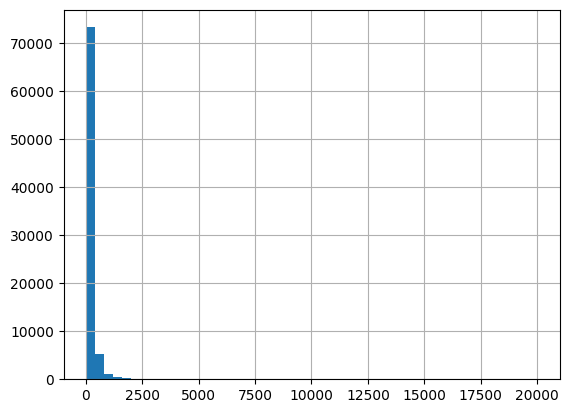

In [9]:
import matplotlib.pyplot as plt

df3['price'].hist(bins=50)
plt.show()

In [10]:
Q1 = df3['price'].quantile(0.25)
Q3 = df3['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

#outliers = (df3[(df3['price'] < lower) | (df3['price'] > upper)])
#outliers.head()
df3['price_outlier'] = ((df3['price'] < lower) | (df3['price'] > upper)).astype(int)

df3["price_outlier"].value_counts()
#print(len(outliers))

C:\Users\rache\AppData\Local\Temp\ipykernel_43116\3291817313.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price_outlier'] = ((df3['price'] < lower) | (df3['price'] > upper)).astype(int)


price_outlier
0    75231
1     5531
Name: count, dtype: int64

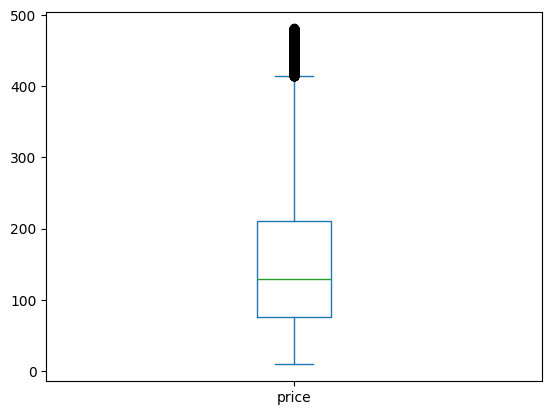

In [11]:
df_no_outliers = df3[df3["price_outlier"] == 0]

df_no_outliers['price'].plot(kind='box')
plt.show()

In [12]:
output_csv_path = "C:\\Users\\rache\\Downloads\\cse2600\\airbnb_data\\Airbnb_data_cleaned2.csv"
df3.to_csv(output_csv_path, index=False)